# Linear Regression


In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

$$
\newcommand{\Ex}{\mathbb{E}}
\newcommand{\Var}{\mathrm{Var}}
\newcommand{\Cov}{\mathrm{Cov}}
\newcommand{\SampleAvg}{\frac{1}{N({S})} \sum_{s \in {S}}}
\newcommand{\indic}{\mathbb{1}}
\newcommand{\avg}{\overline}
\newcommand{\est}{\hat}
\newcommand{\trueval}[1]{#1^{*}}
\newcommand{\Gam}[1]{\mathrm{Gamma}#1}
$$

$$
\renewcommand{\like}{\cal L}
\renewcommand{\loglike}{\ell}
\renewcommand{\err}{\cal E}
\renewcommand{\dat}{\cal D}
\renewcommand{\hyp}{\cal H}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{\mathbf x}
\renewcommand{\v}[1]{\mathbf #1}
$$

##  Linear Regression MLE

Linear regression is the workhorse algorithm thats used in many sciences, social and natural. The diagram below illustrates the probabilistic interpretation of linear regression, and the idea behind the MLE for linear regression. We illustrate a point $(x_i, y_i)$, and the corresponding prediction  for $x_i$ using the line, that is $yhat_i$ or $\hat{y}_i$.

![](images/linregmle.png)

The fundamental assumption for the probabilistic analysis of linear regression is that each $y_i$ is gaussian distributed with mean  $\v{w}\cdot\v{x_i}$ (the y predicted by the regression line so to speak) and variance $\sigma^2$:

$$ y_i \sim N(\v{w}\cdot\v{x_i}, \sigma^2) .$$

Here we have made $\v{x_i}$ a vector, as well as $\v{w}$, since, even in the one dimensional case w can write $\v{x_i} = (1, x_i)$ and $\v{w} = (a, b)$ since their dot product then gives us $a + b x_i$.

We can then write the likelihood:

$$\cal{L} = p( \{y\} | \{\v{x}\}, \v{w}, \sigma) = \prod_i p(y_i | \v{x}_i, \v{w}, \sigma)$$

Given the canonical form of the gaussian:

$$N(\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{-(y - \mu)^2 / 2\sigma^2},$$

we can show that:

$$\cal{L} =  (2\pi\sigma^2)^{(-n/2)} e^{\frac{-1}{2\sigma^2} \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2} .$$

The log likelihood $\ell$ then is given by:

$$\ell = \frac{-n}{2} log(2\pi\sigma^2) - \frac{1}{2\sigma^2}  \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2 .$$

If you differentiate this with respect to  $\v{w}$ and $\sigma$, you get the MLE values of the parameter estimates:

$$\v{w}_{MLE} = (\v{X}^T\v{X})^{-1} \v{X}^T\v{y}, $$

where $\v{X}$ is the design matrix created by stacking rows $\v{x}_i$, and

$$\sigma^2_{MLE} =  \frac{1}{n} \sum_i (y_i -  \v{w}\cdot\v{x}_i)^2  . $$

These are the standard results of linear regression.

## Fitting a regression model in sklearn

The dataset below consists of data generated from a straight line with a lot of noise, and a slope of 80.9 with intercept 0 and a noise standard deviation of 100.

We're going to fit it with `sklearn` without going into the details of how it is fit. For linear regression this can be done analytically

In [2]:
df = pd.read_csv("https://bit.ly/3WdFxM0")
df.head()

,x,y
0,0.032253,47.239197
1,-0.437173,-192.465235
2,-0.140398,103.132677
3,-0.289427,-133.663816
4,-1.430490,-190.064793


We can plot the data.

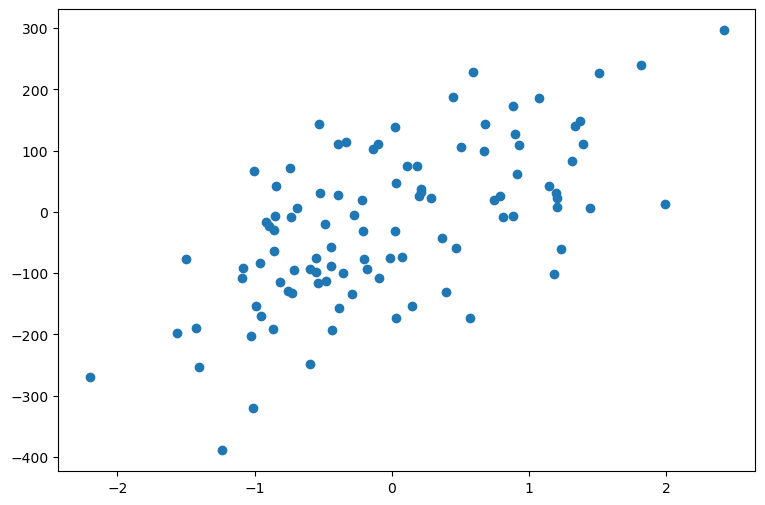

In [3]:
plt.figure(figsize=(9,6))
plt.plot(df.x,df.y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [4]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df.x.values.reshape(-1,1) # reshape into list of lists format

In [7]:
X.shape, df.y.shape

((100, 1), (100,))

In [8]:
lr = LinearRegression()
lr.fit(X,df.y)
fgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_ # the noise gives us a different fit!

(array([90.98935874]), -18.546144343351514)

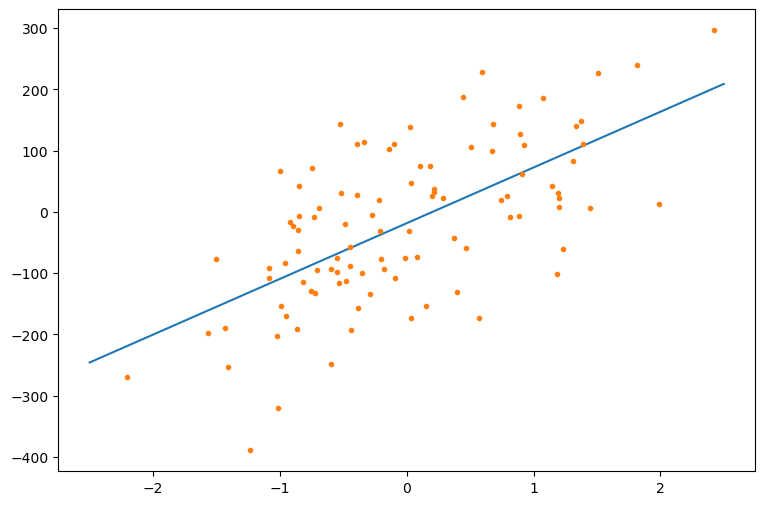

In [9]:
plt.figure(figsize=(9,6))
plt.plot(Xgrid, fgrid)
plt.plot(X, df.y, '.')

## The impact of noise

Lets see how this Gaussian noise affects us. We'll generate a new data set with the fit params from the first one, and add in the noise

In [10]:
from scipy.stats import norm
fpredict = lr.predict(X)
dataset = norm(fpredict, 100).rvs()

In [11]:
dataset.shape

(100,)

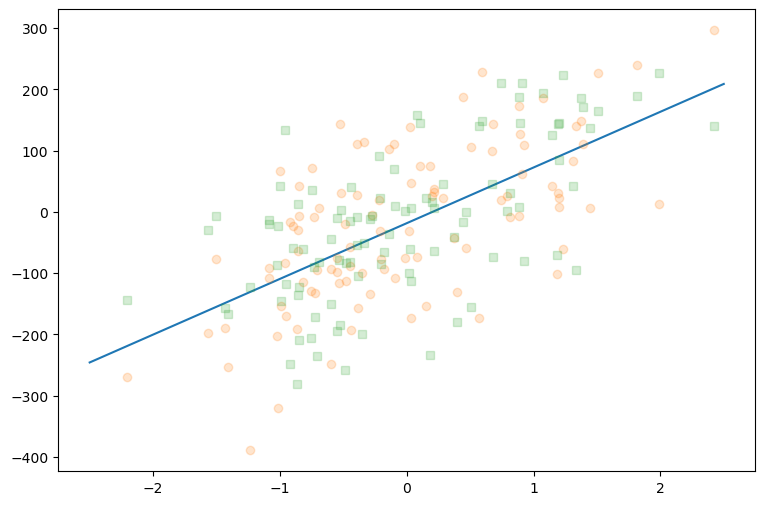

In [12]:
plt.figure(figsize=(9,6))
plt.plot(Xgrid, fgrid)
plt.plot(X, df.y, 'o', alpha=0.2)
plt.plot(X, dataset, 's', alpha=0.2)

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample. We'll do this again and again

In [13]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([62, 74, 30, 30, 64, 97, 93, 32, 46, 74, 18, 89, 14, 66, 51, 94, 10,
       55, 30, 25])

In [14]:
Xsample = X[sample_indices]
ysample = df.y.values[sample_indices]

In [15]:
slopes = np.zeros(100)
intercepts = np.zeros(100)
for i in range(100):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = df.y[sample_indices]
    lr = LinearRegression().fit(Xsample, ysample)
    slopes[i] = lr.coef_
    intercepts[i] = lr.intercept_

/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_23350/1673986589.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slopes[i] = lr.coef_
/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_23350/1673986589.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slopes[i] = lr.coef_
/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_23350/1673986589.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slopes[i] = lr.coef_
/var/folders/td/94qngg

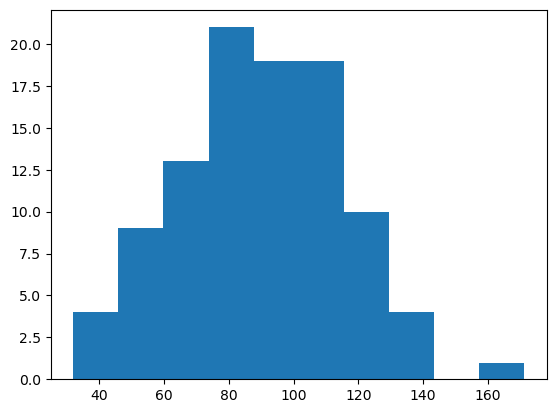

In [16]:
plt.hist(slopes);

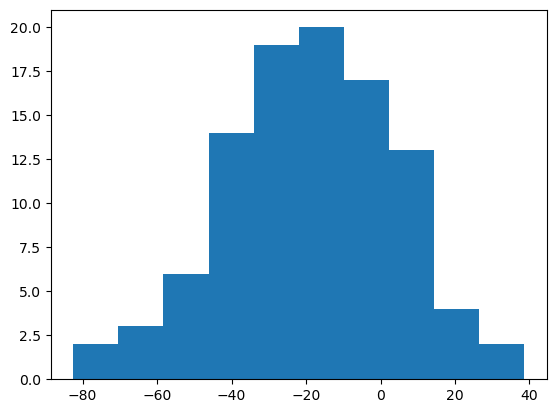

In [17]:
plt.hist(intercepts);

In [18]:
fpredicts = intercepts + slopes*Xgrid

In [19]:
fpredicts.shape

(1000, 100)

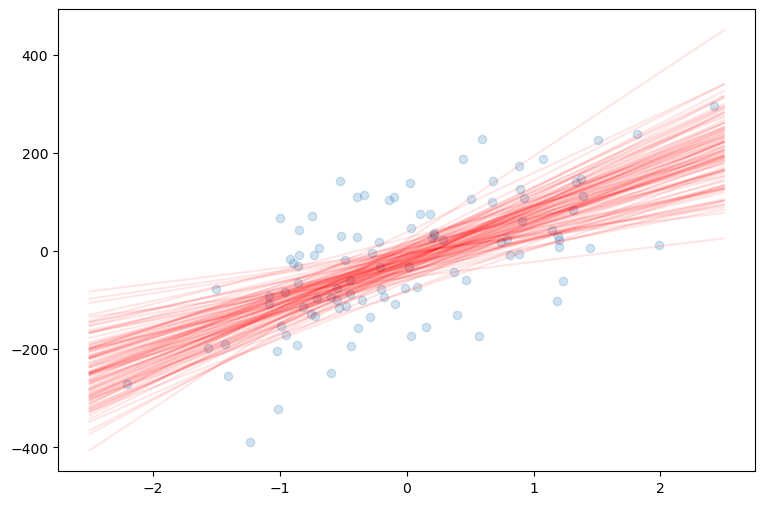

In [20]:
plt.figure(figsize=(9,6))
plt.plot(X, df.y, 'o', alpha=0.2)
for line in range(100):
    vals = fpredicts[:,line]
    plt.plot(Xgrid, vals, color="r", alpha=0.1)

Looks narrow? Remember this is just the sampling distribution of the lines.

Now let us add in one realization of a data set by adding in gaussian noise from each sample

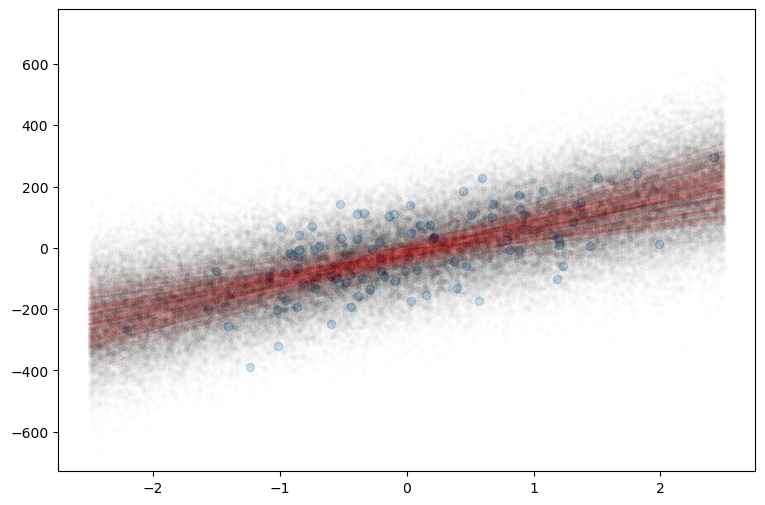

In [21]:
plt.figure(figsize=(9,6))
plt.plot(X, df.y, 'o', alpha=0.2)
for line in range(100):
    vals = fpredicts[:,line]
    gaussvals = norm(vals, 100).rvs()
    plt.plot(Xgrid, vals, color="r", alpha=0.05)
    plt.plot(Xgrid, gaussvals, '.', color="k", alpha=0.009)

In [22]:
df = pd.read_csv("https://bit.ly/3WdFxM0")
df.head()

,x,y
0,0.032253,47.239197
1,-0.437173,-192.465235
2,-0.140398,103.132677
3,-0.289427,-133.663816
4,-1.430490,-190.064793
